# ODE-IVP's: Explicit Runge-Kutta Methods
---

GENERAL PROBLEM: solve the system of first-order ordinary differential equations of the form

\begin{equation}
  \mathbf{y}'(x) \equiv \frac{d}{dx}\mathbf{y}(x) = \mathbf{f}(x,\mathbf{y}(x))
  \quad\text{with}\quad
  \mathbf{y}(x_{0}) = \mathbf{y}_{0}
\end{equation}

using methods with a given local truncation error (higher than second order). This could in principle be done by expanding the solution at $x_{i+1}$ about $x_{i}$:

\begin{align}
  \mathbf{y}(x_{i+1}) &= \mathbf{y}(x_{i}) + h\mathbf{y}'(x_{i})
  + \frac{h^2}{2}\mathbf{y}''(x_{i}) + \frac{h^3}{3!}\mathbf{y}'''(x_{i}) + \mathcal{O}(h^4)
  \\
  &= \mathbf{y}(x_{i}) + h\mathbf{f}(x_{i}, \mathbf{y}(x_{i}))
  + \frac{h^2}{2}\mathbf{f}'(x_{i}, \mathbf{y}(x_{i})) 
  + \frac{h^3}{3!}\mathbf{f}''(x_{i}, \mathbf{y}(x_{i})) + \mathcal{O}(h^4)
\end{align}

where we have used the original ODE to make the replacements 
$\mathbf{y}^{(n)}(x_{i})\rightarrow\mathbf{f}^{(n-1)}(x_{i}, \mathbf{y}(x_{i}))$. 
However, this scheme requires the evaluation of higher-order derivatives of the right-hand side function $\mathbf{f}$, which is costly and painful. Can we find higher-order accurate methods without the need to evaluate higher-order derivatives? 

IDEA: Approximate higher-order derivatives of $\mathbf{f}(x_{i}, \mathbf{y}(x_{i}))$ by interpolating to various nodes between $x_{i}$ and $x_{i+1}$. The free parameters of the interpolated solution can be used to cancel terms in the Taylor series to a desired order of approximation, yielding a method with the desired local truncation error. Requiring a given order of accuracy constrains the free parameters, but not completely. There is still freedom to choose different combinations of parameters, which leads to many different RK methods, even for a given order of accuracy.

PRE-REQUISITES:
- ODE-IVP's: Euler methods

REFERENCES:
- [1] DeVries and Hasbun, *A First Course in Computational Physics, 2nd edition*.
- [2] Garcia, *Numerical Methods for Physicists, 2nd edition*.
- [3] Burden and Faires, *Numerical Analysis, 7th edition*.
- [4] Ralston and Rabinowitz, *A First Course in Numerical Analysis, 2nd edition*.
- [5] LeVeque, *Finite Difference Methods for Ordinary and Partial Differential Equations*.
- [6] Press et al, *Numerical Recipes, 3rd edition*.

## 1. Runge-Kutta theory

We seek an approximation with $r$ *stages* of the form

\begin{align}
  \mathbf{y}(x_{i+1}) = \mathbf{y}(x_{i}) + h \sum_{n=1}^{r}b_{n}\mathbf{k}_{n}
\end{align}

where the $b_{n}$'s are *weights* of each stage and the $\mathbf{k}_{n}$'s are given by

\begin{align}
  \mathbf{k}_{n} = \mathbf{f}[x_{i} + h c_{n}, y(x_{i}) + h \sum_{m<n}a_{nm}\mathbf{k}_{m}] 
\end{align}

The $c_{n}$'s are called *nodes* and the $a_{nm}$'s are matrix elements. The coefficients of a Runge-Kutta scheme can be represented using Butcher tableau as follows (see [5])

\begin{array}{c|ccc}
  c_{1}  &        &        &            & \\
  c_{2}  & a_{21} &        &            & \\
  \vdots & \vdots & \ddots &            & \\
  c_{r}  & a_{r1} & \cdots & a_{r(r-1)} & \\
  \hline
         & b_{1}  & \cdots & b_{r-1}    & b_{r}
\end{array}

For **explicit** schemes, all of the matrix elements on and above the diagonal are zero, i.e., $a_{nm}=0$ for all $n\geq m$. If this does not hold, the scheme is called **implicit**. A special case of implicit methods are **diagonal explicit Runge-Kutta** methods (DIRK's), where $a_{nm}=0$ for all $n\gt m$, but at least one diagonal component is non-vanishing (see [5] for discussion of these methods).

To obtain conditions on the $b_{n}$'s, $c_{n}$'s, and $a_{nm}$'s, one expands both sides of the above ansatz in a Taylors series and then matches terms to the desired order. A brief summary of this procedure is given here. For more details, see [4]. 

On the right-hand side of the above ansatz, the stage functions $\mathbf{k}_{n}$ are expanded using Taylor series in two variables

\begin{equation}
  \mathbf{f}[x_{i} + h c_{n}, y(x_{i}) + h\sum_{n<m}a_{nm}\mathbf{k}_{m}]
  = \sum_{p=0}^{\infty}\frac{h^p}{p!}D^{(p)}_{n}\mathbf{f}[x_{i},y(x_{i})]
\end{equation}

where 

\begin{equation}
  D_{n}\mathbf{f}[x_{i},y(x_{i})] = \left.\left(c_{n}\frac{\partial}{\partial x} 
  + \sum_{n<m}a_{nm}\mathbf{k}_{m}\frac{\partial}{\partial y}\right)\mathbf{f}[x,y(x)]\right|_{x=x_{i}}
\end{equation}


Next, on the left-hand side of the ansatz, the function $\mathbf{y}(x_{i+1})$ is expanded in a Taylor series about $x_{i}$, yielding

\begin{align}
  \mathbf{y}(x_{i+1}) &= \mathbf{y}(x_{i}) + h\mathbf{y}'(x_{i})
  + \frac{h^2}{2}\mathbf{y}''(x_{i}) + \frac{h^3}{3!}\mathbf{y}'''(x_{i}) + \cdots \\
  &= \mathbf{y}(x_{i}) + h\mathbf{f}[x_{i},y(x_{i})]
  + \frac{h^2}{2}\mathbf{f}'[x_{i},y(x_{i})] + \frac{h^3}{3!}\mathbf{f}''[x_{i},y(x_{i})] + \cdots \\
  &= \mathbf{y}(x_{i}) + \sum_{n}^{\infty}\frac{h^{n+1}}{(n+1)!}D^{(n)}\mathbf{f}[x_{i},y(x_{i})]
\end{align}

where 

\begin{equation}
  D\mathbf{f}[x_{i},y(x_{i})] = \left.\left(\frac{\partial}{\partial x} 
  + f\frac{\partial}{\partial y}\right)\mathbf{f}[x,y(x)]\right|_{x=x_{i}}
\end{equation}

Once both of these expansions are carried out sufficiently far, conditions are found by requiring that all terms on the left-hand side match the right-hand side, and hence cancel, up to the desired order of accuracy. For example, if one wants a $p$th-order accurate method, one requires that all terms up to $\mathcal{O}(h^{p})$ cancel, so that the remainder (the one-step error) is $\mathcal{O}(h^{p+1})$

## 2. Second-order Runge-Kutta

We'll carry out this procedure for the simple case of second-order accurate Runge-Kutta schemes. Start with the two-stage Runge-Kutta ansatz

\begin{align}
  \mathbf{y}(x_{i+1}) = \mathbf{y}(x_{i}) + h b_{1}\mathbf{k}_{1} + h b_{2}\mathbf{k}_{2}
\end{align}

where 

\begin{align}
  & \mathbf{k}_{1} = \mathbf{f}[x_{i} + h c_{1}, \mathbf{y}(x_{i})]
  \\
  & \mathbf{k}_{2} = \mathbf{f}[x_{i} + h c_{2}, \mathbf{y}(x_{i}) + h a_{21}\mathbf{k}_{1}]
\end{align}

The expansion of the right-hand side gives

\begin{align}
  y(x_{i}) + h b_{1}\mathbf{k}_{1} + h b_{2}\mathbf{k}_{2}
  = y(x_{i}) + (b_{1} + b_{2})h\mathbf{f} 
  + (b_{1}c_{1} + b_{2}c_{2})h^2\frac{\partial \mathbf{f}}{\partial x}
  + b_{2}a_{21}h^2\mathbf{f}\frac{\partial \mathbf{f}}{\partial y} + \mathcal{O}(h^3)
\end{align}

while the left-hand side gives

\begin{align}
  y(x_{i+1})
  &= y(x_{i}) + h\mathbf{f} + \frac{h^2}{2}D\mathbf{f} + \mathcal{O}(h^3) \\
  &= y(x_{i}) + h\mathbf{f}
  + \frac{1}{2}h^2\frac{\partial \mathbf{f}}{\partial x}
  + \frac{1}{2}h^2\mathbf{f}\frac{\partial \mathbf{f}}{\partial y} + \mathcal{O}(h^3)
\end{align}


Requiring that all terms through $\mathcal{O}(h^2)$ vanish leads to the conditions

\begin{equation}
  b_{1} + b_{2} = 1
  \quad,\quad
  b_{1}c_{1} + b_{2}c_{2} = 1/2
  \quad,\quad
  b_{2}a_{21} = 1/2
\end{equation}

These are three equations in five undetermined coefficients, hence the system is under determined. That is, there are infinitely many solutions. 

Three common examples are the following:

\begin{array}{llll}
  \text{Midpoint}:       & b_{1}=0   & b_{2}=1   & c_{1}=0 & c_{2}=1/2 & a_{21}=1/2 \\
  \text{Modified Euler}: & b_{1}=1/2 & b_{2}=1/2 & c_{1}=0 & c_{2}=1   & a_{21}=1   \\
  \text{Heun}:           & b_{1}=1/4 & b_{2}=3/4 & c_{1}=0 & c_{2}=2/3 & a_{21}=2/3
\end{array}

[NOTE: the midpoint and modified Euler methods were introduced earlier (see [01-euler-methods.ipynb](https://github.com/ericjwest/NumericalMethods/blob/master/ODESolve/01-euler-methods.ipynb))]

Putting the above choices back into the original ansatz yields

\begin{array}{ll}
  \text{Midpoint}:
  & \mathbf{y}(x_{i+1}) = \mathbf{y}(x_{i})
  \quad\quad\quad\quad\quad\,\,\,
  + h\mathbf{f}[x_{i} + \frac{h}{2}, 
  \mathbf{y}(x_{i}) + \frac{h}{2}\mathbf{f}[x_{i}, \mathbf{y}(x_{i})]] \\
  \text{Modified Euler}:
  & \mathbf{y}(x_{i+1}) = \mathbf{y}(x_{i})
  + \frac{h}{2}\mathbf{f}[x_{i}, \mathbf{y}(x_{i})]
  + \frac{h}{2}\mathbf{f}[x_{i} + h, 
  \mathbf{y}(x_{i}) + h\mathbf{f}[x_{i}, \mathbf{y}(x_{i})]] \\
  \text{Heun}:
  & \mathbf{y}(x_{i+1}) = \mathbf{y}(x_{i})
  + \frac{h}{4}\mathbf{f}[x_{i}, \mathbf{y}(x_{i})]
  + \frac{3h}{4}\mathbf{f}[x_{i} + \frac{2h}{3}, 
  \mathbf{y}(x_{i}) + \frac{2h}{3}\mathbf{f}[x_{i}, \mathbf{y}(x_{i})]] \\
\end{array}

The Butcher tableau for these methods are

\begin{align}
  \begin{array}{c|cc}
    c_{1} &        &  \\
    c_{2} & a_{21} &  \\
    \hline
          & b_{1}  & b_{2}
  \end{array}
  \quad:\quad
  \begin{array}{c|cc}
    0   &     &  \\
    1/2 & 1/2 &  \\
    \hline
        & 0   & 1
  \end{array}
  \quad,\quad
  \begin{array}{c|cc}
    0 &     &  \\
    1 & 1   &  \\
    \hline
      & 1/2 & 1/2
  \end{array}
  \quad,\quad
  \begin{array}{c|cc}
    0   &     &  \\
    2/3 & 2/3 &  \\
    \hline
        & 1/4 & 3/4
  \end{array}  
\end{align}

### CODE: RK2 Heun

In [2]:
%%writefile rk2_heun.py
def rk2_step (x, y, f, h):
    """
    Evolve solution by one step using the Heun method
    
    INPUT
    x : current x position
    y : current y values (1D array)
    f : rhs function handle (takes x and y as arguments)
    h : current stepsize
    
    OUTPUT
    YY : new y value (1D array)
    
    """
        
    # Runge-Kutta weights
    b1 = 1/4
    b2 = 3/4
    
    # Runge-Kutta nodes
    c1 = 0
    c2 = 2/3
    
    # Runge-Kutta matrix elements
    a21 = 2/3;
 
    # Runge-Kutta stages
    k1 = f(x + h*c1, y)
    k2 = f(x + h*c2, y + h*(a21*k1))
       
    # advance the solution
    YY = y + h*(b1*k1 + b2*k2)
        
    return YY 

Writing rk2_heun.py


## 3. Fourth-order Runge-Kutta 

To obtain a fourth-order Runge-Kutta scheme, we need a four-stage ansatz 

\begin{align}
  \mathbf{y}(x_{i+1}) = \mathbf{y}(x_{i}) + h b_{1}\mathbf{k}_{1} 
  + h b_{2}\mathbf{k}_{2} + h b_{3}\mathbf{k}_{3} + h b_{4}\mathbf{k}_{4}
\end{align}

with

\begin{align}
  & \mathbf{k}_{1} = \mathbf{f}[x_{i} + h c_{1}, \mathbf{y}(x_{i})]
  \\
  & \mathbf{k}_{2} = \mathbf{f}[x_{i} + h c_{2}, \mathbf{y}(x_{i}) + h a_{21}\mathbf{k}_{1}]
  \\
  & \mathbf{k}_{3} = \mathbf{f}[x_{i} + h c_{3}, \mathbf{y}(x_{i}) 
  + h a_{31}\mathbf{k}_{1} + h a_{32}\mathbf{k}_{2}]
  \\
  & \mathbf{k}_{4} = \mathbf{f}[x_{i} + h c_{4}, \mathbf{y}(x_{i}) 
  + h a_{41}\mathbf{k}_{1} + h a_{42}\mathbf{k}_{2} + h a_{43}\mathbf{k}_{3}]
\end{align}

We won't go through the derivation of the conditions on the weights, nodes, and matrix elements in this case. The derivation is tedious (see [4]). Instead we just give the most common fourth-order Runge-Kutta scheme. The Butcher tableau is 

\begin{align}
  \begin{array}{c|cccc}
    c_{1} &        &        &        & \\
    c_{2} & a_{21} &        &        & \\
    c_{3} & a_{31} & a_{32} &        & \\
    c_{4} & a_{41} & a_{42} & a_{43} & \\
    \hline
          & b_{1}  & b_{2}  & b_{3}  & b_{4}
  \end{array}
  \quad = \quad
  \begin{array}{c|cccc}
    0   &     &     &     & \\
    1/2 & 1/2 &     &     & \\
    1/2 & 0   & 1/2 &     & \\
    1   & 0   & 0   & 1   & \\
    \hline
        & 1/6 & 1/3 & 1/3 & 1/6
  \end{array}
\end{align}

Putting these values back into the original ansatz yields

\begin{align}
  \mathbf{y}(x_{i+1}) = \mathbf{y}(x_{i}) 
  + \frac{h}{6}(\mathbf{k}_{1} + 2\mathbf{k}_{2} 
  + 2\mathbf{k}_{3} + \mathbf{k}_{4})
\end{align}

with

\begin{align}
  & \mathbf{k}_{1} = \mathbf{f}[x_{i}, \mathbf{y}(x_{i})]
  \\
  & \mathbf{k}_{2} = \mathbf{f}[x_{i} + \frac{h}{2}, \mathbf{y}(x_{i}) + \frac{h}{2}\mathbf{k}_{1}]
  \\
  & \mathbf{k}_{3} = \mathbf{f}[x_{i} + \frac{h}{2}, \mathbf{y}(x_{i}) + \frac{h}{2}\mathbf{k}_{2}]
  \\
  & \mathbf{k}_{4} = \mathbf{f}[x_{i} + h, \mathbf{y}(x_{i}) + h\mathbf{k}_{3}]
\end{align}

### CODE: RK4

In [3]:
%%writefile rk4.py
def rk4_step (x, y, f, h):
    """
    Evolve solution by one step using the standard 
    fourth-order Runge-Kutta method
    
    INPUT
    x : current x position
    y : current y values (1D array)
    f : rhs function handle (takes x and y as arguments)
    h : current stepsize
    
    OUTPUT
    YY : new y value (1D array)
    
    """
        
    # Runge-Kutta weights
    b1 = 1/6
    b2 = 1/3
    b3 = 1/3
    b4 = 1/6
    
    # Runge-Kutta nodes
    c1 = 0
    c2 = 1/2
    c3 = 1/2
    c4 = 1
    
    # Runge-Kutta matrix elements
    a21 = 1/2;
    a31 = 0; a32 = 1/2 ;
    a41 = 0; a42 = 0 ; a43 = 1;

    # Runge-Kutta stages
    k1 = f(x + h*c1, y)
    k2 = f(x + h*c2, y + h*(a21*k1))
    k3 = f(x + h*c3, y + h*(a31*k1 + a32*k2))
    k4 = f(x + h*c4, y + h*(a41*k1 + a42*k2 + a43*k3))
       
    # advance the solution
    YY = y + h*(b1*k1 + b2*k2 + b3*k3 + b4*k4)
        
    return YY 

Overwriting rk4.py


## 4. Implement

In [11]:
%run euler.py
%run euler_midpt.py
%run euler_meanval.py
%run rk2_heun.py
%run rk4.py

<IPython.core.display.Javascript object>


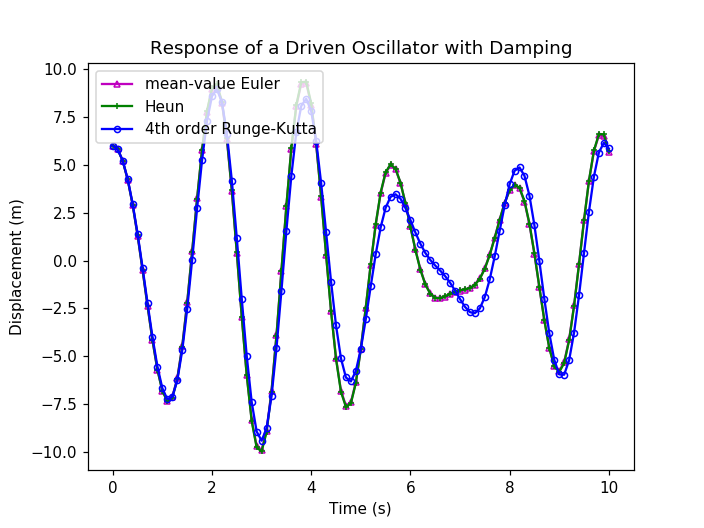

In [41]:
# oscillator
"""
Program to compute the motion of a one-dimensional oscillator
"""

# set graphics backend
%matplotlib notebook

# import libraries
import numpy as np
import matplotlib.pyplot as plt

# oscillator rhs function
def f (t, x):
    dxdt = np.zeros(2)
    dxdt[0] = x[1]
    dxdt[1] = -omega0**2*x[0] - 2*beta*x[1] + F(t, f0, omegaF)
    return dxdt

# driving force
def F(t, amp, freq):
    return amp*np.cos(freq*t)

# set model parameters
mass = 1.0
springK = 10.0
omega0 = np.sqrt(springK/mass)
beta = 0.1
f0 = 20.0
omegaF = 1.3*omega0

# set initial position and velocity 
x0 = 6.0
v0 = 0.0

# number of steps, time grid, stepsize
tStart = 0.0
tEnd = 10.0
h = 0.1
nsteps = int((tEnd - tStart)/h)
t = np.linspace(tStart, tEnd, nsteps + 1)
#print('Stepsize = %g \n' % h)

# initialize output arrays (euler)
x_eul = np.zeros((2, nsteps + 1))
x_eul[0] = x0
x_eul[1] = v0

# initialize output arrays (midpoint euler)
x_mid = np.zeros_like(x_eul)
x_mid[0] = x0
x_mid[1] = v0

# initialize output arrays (mean-value euler)
x_mv = np.zeros_like(x_eul)
x_mv[0] = x0
x_mv[1] = v0

# initialize output arrays (RK2, heun)
x_rk2 = np.zeros_like(x_eul)
x_rk2[0] = x0
x_rk2[1] = v0

# initialize output arrays (RK4)
x_rk4 = np.zeros_like(x_eul)
x_rk4[0] = x0
x_rk4[1] = v0

# numerical solution 
for i in range(0, nsteps): 

    # apply ODE-solver step
    x_eul[:,i+1] = euler_step(t[i], x_eul[:,i], f, h)
    x_mid[:,i+1] = euler_midpt_step(t[i], x_mid[:,i], f, h)
    x_mv[:,i+1] = euler_meanval_step(t[i], x_mv[:,i], f, h)
    x_rk2[:,i+1] = rk2_step(t[i], x_rk2[:,i], f, h)
    x_rk4[:,i+1] = rk4_step(t[i], x_rk4[:,i], f, h)
    t[i+1] = t[i] + h

# plot the results
import matplotlib.pyplot as plt
%matplotlib notebook
fig, ax1 = plt.subplots(1,1)
#ax1.plot(t, x_eul[0,:],'r-.', label='simple Euler')
#ax1.plot(t, x_mid[0,:],'m:', label='midpoint Euler')
ax1.plot(t, x_mv[0,:],'m', marker='^', ms=4, mfc='None', label='mean-value Euler')
ax1.plot(t, x_rk2[0,:],'g', marker='+', ms=4, mfc='None', label='Heun')
ax1.plot(t, x_rk4[0,:],'b', marker='o', ms=4, mfc='None', label='4th order Runge-Kutta')
ax1.set_title('Response of a Driven Oscillator with Damping')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Displacement (m)')
ax1.legend(loc='upper left')
fig.show()

## 5. Convergence tests 

<IPython.core.display.Javascript object>


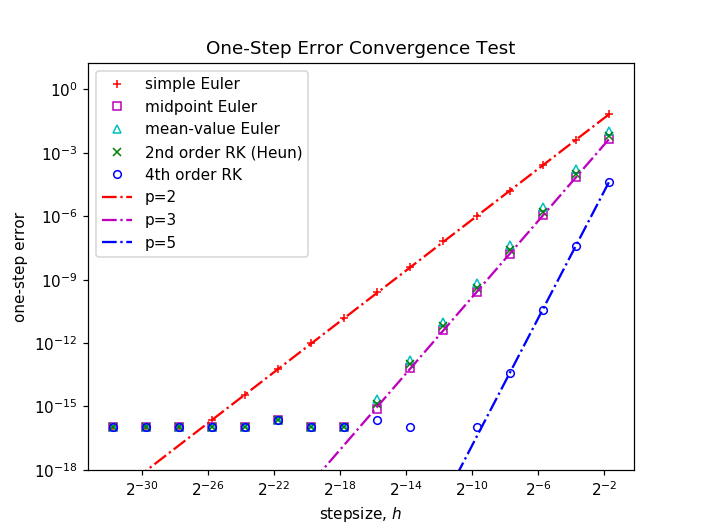

In [42]:
### convergence test ###
import numpy as np 

# rhs function
def f(x,y):
    return y - x**2 + 1

# exact solution
def y_exact(x, x0 ,y0):
    return (x + 1)**2 + (y0 - (x0 + 1)**2)*np.exp(x - x0)

# initial conditions
x0 = 0.
y0 = 0.5

# compute stepsizes
xmin = x0
xmax = 3.0
N = 10 #number of steps for the base case, i.e, course resolution
nsteps = N*np.logspace(0, 30, 16, base=2)
hvals = (xmax - xmin)/nsteps

# initialize one-step error arrays
err_eul = np.zeros_like(hvals)
err_mid = np.zeros_like(hvals)
err_mv = np.zeros_like(hvals)
err_rk2 = np.zeros_like(hvals)
err_rk4 = np.zeros_like(hvals)

# calculate one-step error for different resolutions
for i in range(0, len(hvals)):

    # step-size 
    h = hvals[i]

    # initialize output arrays
    x = np.zeros(2)
    x[0] = x0

    y_eul = np.zeros_like(x)
    y_eul[0] = y0

    y_mid = np.zeros_like(x)
    y_mid[0] = y0

    y_mv = np.zeros_like(x)
    y_mv[0] = y0

    y_rk2 = np.zeros_like(x)
    y_rk2[0] = y0

    y_rk4 = np.zeros_like(x)
    y_rk4[0] = y0
    
    # numerical solutions
    x[1] = x[0] + h
    y_eul[1] = euler_step(x[0], y_eul[0], f, h)
    y_mid[1] = euler_midpt_step(x[0], y_mid[0], f, h)
    y_mv[1] = euler_meanval_step(x[0], y_mv[0], f, h)
    y_rk2[1] = rk2_step(x[0], y_rk2[0], f, h)
    y_rk4[1] = rk4_step(x[0], y_rk4[0], f, h)

    # calculate one-step errors
    err_eul[i] = np.abs(y_eul[1] - y_exact(x[1], x0, y0))
    err_mid[i] = np.abs(y_mid[1] - y_exact(x[1], x0, y0))
    err_mv[i] = np.abs(y_mv[1] - y_exact(x[1], x0, y0))
    err_rk2[i] = np.abs(y_rk2[1] - y_exact(x[1], x0, y0))
    err_rk4[i] = np.abs(y_rk4[1] - y_exact(x[1], x0, y0))

# plot the results
import matplotlib.pyplot as plt
%matplotlib notebook
fig, ax1 = plt.subplots(1,1)
ax1.loglog(hvals, err_eul, 'r+', \
           markersize=5, markeredgewidth=1, markerfacecolor='none', label='simple Euler')
ax1.loglog(hvals, err_mid, 'ms', \
           markersize=5, markeredgewidth=1, markerfacecolor='none', label='midpoint Euler')
ax1.loglog(hvals, err_mv, 'c^', \
           markersize=5, markeredgewidth=1, markerfacecolor='none', label='mean-value Euler')
ax1.loglog(hvals, err_rk2, 'gx', \
           markersize=5, markeredgewidth=1, markerfacecolor='none', label='2nd order RK (Heun)')
ax1.loglog(hvals, err_rk4, 'bo', \
           markersize=5, markeredgewidth=1, markerfacecolor='none', label='4th order RK')
ax1.loglog(hvals, err_eul[0]*(hvals/hvals[0])**2, 'r-.', label='p=2')
ax1.loglog(hvals, err_mid[0]*(hvals/hvals[0])**3, 'm-.', label='p=3')
#ax1.loglog(hvals, err_mv[0]*(hvals/hvals[0])**3, 'm:', label='p=3')
#ax1.loglog(hvals, err_rk2[0]*(hvals/hvals[0])**3, 'g--', label='p=5')
ax1.loglog(hvals, err_rk4[0]*(hvals/hvals[0])**5, 'b-.', label='p=5')
ax1.set_xscale('log', basex=2)
ax1.set_xlabel(r"stepsize, $h$")
ax1.set_ylabel(r"one-step error")
ax1.set_ylim(1e-18)
ax1.set_title("One-Step Error Convergence Test")
ax1.legend(loc="upper left", numpoints=1)
fig.show()